# Задание 1

1. Смоделировать 4 выборки объемом 1000 из разных законов распределения: нормальное, экспоненциальное, равномерное и любой другой закон распределения на выбор.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [33]:
normal_distribut = stats.norm(scale=1)
normal = normal_distribut.rvs(size=1000)

expo_distribut = stats.expon(scale=1)
expo = expo_distribut.rvs(size=1000)

unif_distribut = stats.uniform(scale=1)
unif = unif_distribut.rvs(size=1000)

logg_distribut = stats.lognorm(s=0.99,scale=1)
logg = logg_distribut.rvs(size=1000)

2. Для каждой выборки посчитать описательные характеристики (минимум и максимум, мат. ожидание, дисперсия, стандартное отклонение, квантили уровней 0.25 и 0.75, размах, медиана, коэффициенты асимметрии и эксцесса). 

In [34]:
def calc_character(distribution, num):
    min_value = np.min(num) #minimum
    max_value = np.max(num) #maximum
    avg_value = num.mean() #мат ожидание
    var_value = num.var() #дисперсия
    std_value = num.std() #среднее квадр откл
    quantiles = np.quantile(num, [0.25, 0.75]) #
    q75_value = quantiles[1] #0,75 квантиль
    q25_value = quantiles[0] #0,25 квантиль
    rng_value = np.ptp(num) #размах
    med_value = np.median(num) #медиана
    assim_value = stats.skew(num) #коэф ассиметрии
    krt_value = stats.kurtosis(num) #эксцесс
    
    return{
        'distribution': distribution,
        'min':min_value, #minimum
        'max':max_value, #maximum
        'avg':avg_value, #мат ожидание
        'var':var_value, #дисперсия
        'std':std_value, #среднее квадр откл
        'q25':q25_value, #0,75 квантиль
        'q75':q75_value, #0,25 квантиль
        'rng':rng_value, #размах
        'med':med_value, #медиана
        'assim':assim_value, #коэф ассиметрии
        'krt':krt_value} #эксцесс

In [35]:
res1 = calc_character('Нормальное', normal)
res2 = calc_character('Экспоненциальное',expo)
res3 = calc_character('Равномерное', unif)
res4 = calc_character('Логарифмическое', logg)

3. Создать pandas.DataFrame с полученными в п. 2 значениями.

In [36]:
data = {
    'distribution': [],
    'min': [], #minimum
    'max': [], #maximum
    'avg': [], #мат ожидание
    'var': [], #дисперсия
    'std': [], #среднее квадр откл
    'q25': [], #0,75 квантиль
    'q75': [], #0,25 квантиль
    'rng': [], #размах
    'med': [], #медиана
    'assim': [], #коэф ассиметрии
    'krt': [] #эксцесс
}
df = pd.DataFrame(data)
df

,distribution,min,max,avg,var,std,q25,q75,rng,med,assim,krt


In [37]:
df.loc[0] = res1
df

,distribution,min,max,avg,var,std,q25,q75,rng,med,assim,krt
0,Нормальное,-3.03096,4.115979,-0.027985,0.985738,0.992844,-0.745676,0.680127,7.146938,-0.025328,0.111141,-0.046961


In [38]:
df.to_csv('task_1.csv')

# Задание 2

1. Загрузить файл titanic.csv

In [39]:
df = pd.read_csv('titanic.csv', delimiter=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. С помощью describe() и info() вывести основную информацию.

In [40]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. Указать в качестве индекса столбец PassengerId.

In [42]:
df.set_index('PassengerId', inplace=True)

In [43]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


4. Преобразовать столбец Sex в числовые значения – 0 и 1 для Male и Female соответственно.

In [44]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S


5. Сделать сортировку по столбцу Sex по возрастанию и Age по убыванию. Вывести первые 10 и последние 10 строк.

In [45]:
sort_df = df.sort_values(by=['Sex', 'Age'], ascending=[True, False])
sort_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,NaN,S
97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
494,0,1,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,NaN,C
117,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.7500,NaN,Q
673,0,2,"Mitchell, Mr. Henry Michael",0,70.0,0,0,C.A. 24580,10.5000,NaN,S
746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S
34,0,2,"Wheadon, Mr. Edward H",0,66.0,0,0,C.A. 24579,10.5000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C


In [46]:
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

7. Сохранить результат в файл prepared_task_2.xlsx.

In [47]:
df.to_excel('prepared_task_2.xlsx', index=True)

# Задание 3

1. Загрузить файл prepared_task_2.xlsx, полученный в задании №2.

In [48]:
df = pd.read_excel('prepared_task_2.xlsx', index_col='PassengerId')

In [49]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C


2. Визуализировать с помощью графиков значения полученного датафрейма.

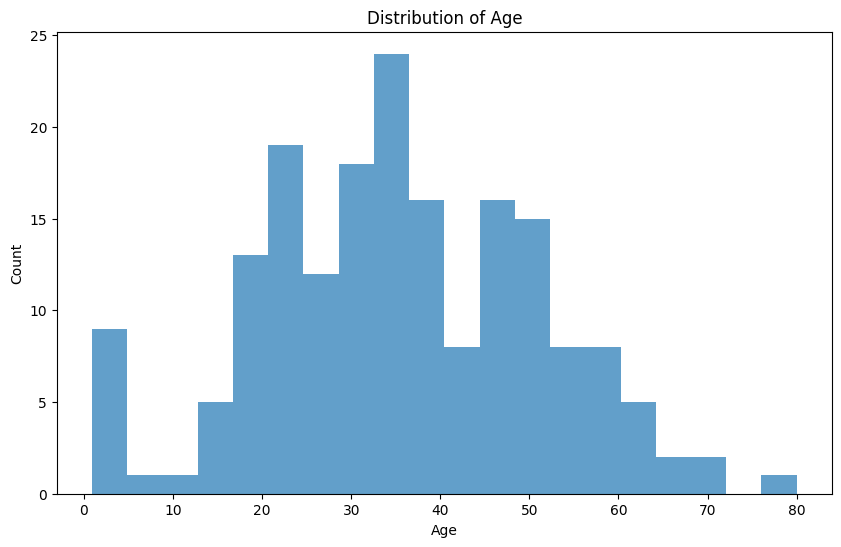

In [50]:
plt.figure(figsize=(10 ,6))
df['Age'].plot(kind='hist', bins=20, alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

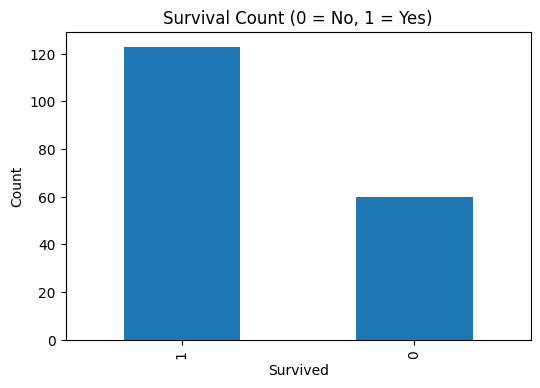

In [51]:
plt.figure(figsize=(6, 4))
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

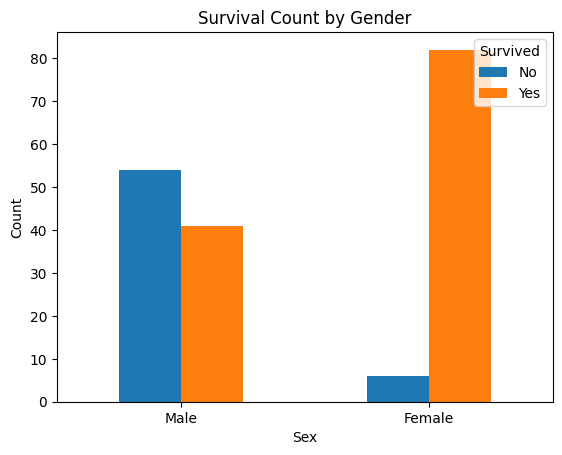

In [52]:
survived_mapping = {0: 'No', 1:'Yes'}
df['Survived_Label'] = df['Survived'].map(survived_mapping)
survival_by_sex = df.groupby('Sex')['Survived_Label'].value_counts().unstack()

survival_by_sex.plot(kind='bar')
plt.title('Survival Count by Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(title='Survived', loc='upper right')
plt.show()